In [1]:
import time
import pandas as pd
from denmune import DenMune

using NGT, Proximity matrix has been calculated  in:  0.003833770751953125  seconds
Dataset's Groundtruht


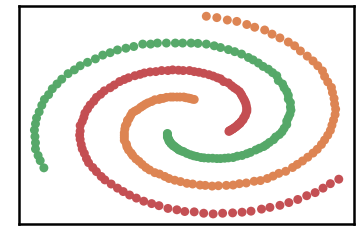



There are 0 outlier point(s) in black (noise of type-1) represent 0% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 91 clusters 



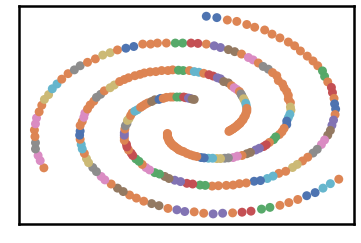

k= 1 :Validity score is: 0.14845938375350137 but best score is 0.14845938375350137 at k= 1     

using NGT, Proximity matrix has been calculated  in:  0.0027391910552978516  seconds
There are 19 outlier point(s) in black (noise of type-1) represent 6% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 9 clusters 



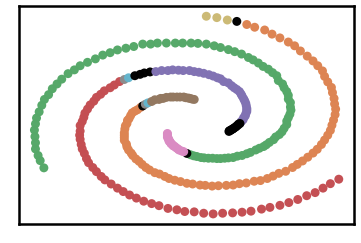

k= 2 :Validity score is: 0.8116794450556772 but best score is 0.8116794450556772 at k= 2     

using NGT, Proximity matrix has been calculated  in:  0.004769802093505859  seconds
k= 3 :Validity score is: 0.3778102085069554 but best score is 0.8116794450556772 at k= 2     

using NGT, Proximity matrix has been calculated  in:  0.0032205581665039062  seconds
There are 3 outlier point(s) in black (noise of type-1) represent 1% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 4 clusters 



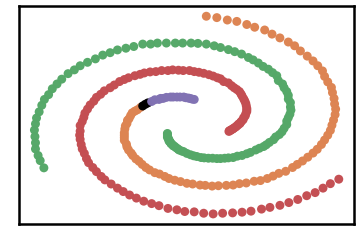

k= 4 :Validity score is: 0.9663899397505955 but best score is 0.9663899397505955 at k= 4     

using NGT, Proximity matrix has been calculated  in:  0.0043849945068359375  seconds
k= 5 :Validity score is: 0.8077914495470682 but best score is 0.9663899397505955 at k= 4     

using NGT, Proximity matrix has been calculated  in:  0.06063246726989746  seconds
There are 0 outlier point(s) in black (noise of type-1) represent 0% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 4 clusters 



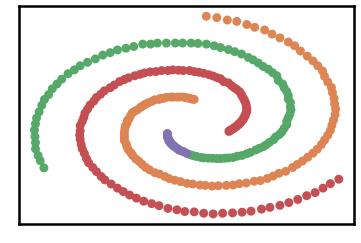

k= 6 :Validity score is: 0.9665223519935561 but best score is 0.9665223519935561 at k= 6     

using NGT, Proximity matrix has been calculated  in:  0.0032248497009277344  seconds
k= 7 :Validity score is: 0.9394987035436474 but best score is 0.9665223519935561 at k= 6     

using NGT, Proximity matrix has been calculated  in:  0.0033185482025146484  seconds
k= 8 :Validity score is: 0.9369036800671918 but best score is 0.9665223519935561 at k= 6     

using NGT, Proximity matrix has been calculated  in:  0.0034618377685546875  seconds
k= 9 :Validity score is: 0.8912011418940893 but best score is 0.9665223519935561 at k= 6     

using NGT, Proximity matrix has been calculated  in:  0.004963397979736328  seconds
k= 10 :Validity score is: 0.8249420823584819 but best score is 0.9665223519935561 at k= 6     



<Figure size 432x288 with 0 Axes>

In [2]:
# Denmune's Paramaters
# DenMune(dataset=dataset, k_nearest=n, data_path=data_path, verpose=verpose_mode, show_plot=show_plot, show_noise=show_noise)
dataset = 'spiral' # let us take Spiral dataset as an example
verpose_mode = True # view in-depth analysis of time complexity and outlier detection, num of clusters
data_path = 'data/' # change it to whatever you put your data, set it to ''; so it will retrive from current folder
show_plot = True  # show plots on/off
show_noise = True # show noise and outlier on/off

# loop's parameters
start = 1
step = 1
end=10

# Validity indexes' parameters
validity_val = -1
best_k = 0
best_val = -1

validity_idx = 2 # Acc=1, F1-score=2,  NMI=3, AMI=4, ARI=5,  Homogeneity=6, and Completeness=7
df = pd.DataFrame(columns =['K', 'ACC', 'F1', 'NMI', 'AMI', 'ARI','Homogeneity', 'Completeness', 'Time' ])

    
for n in range(start, end+1, step):
    start_time = time.time()
    dm = DenMune(dataset=dataset, k_nearest=n, data_path=data_path, verpose=verpose_mode, show_noise=show_noise)
    labels_true, labels_pred = dm.output_Clusters()
    if show_plot == True and n==start:
        # Let us plot the groundtruth of this dataset which is reduced to 2-d using t-SNE
        print ("Dataset\'s Groundtruht")
        dm.plot_clusters(labels_true, ground=True)
        print('\n', "=====" * 20 , '\n')       
               
    end_time = time.time()
    
    validity_indexes = dm.validate_Clusters(labels_true, labels_pred)
    validity_val = validity_indexes[validity_idx]
    validity_indexes[0] = n
    validity_indexes[8] = end_time - start_time
    
    df = df.append(pd.Series(validity_indexes, index=df.columns ), ignore_index=True)
    
    if (best_val < validity_val):
        best_val = validity_val
        best_k = n
        # Let us show results where only an improve in accuracy is detected
        if show_plot:
            dm.plot_clusters(labels_pred, show_noise=show_noise)
    print ('k=' , n, ':Validity score is:', validity_val , 'but best score is', best_val, 'at k=', best_k , end='     ')
            
    if not verpose_mode:
        print('\r', end='')
    else:
        print('\n', "=====" * 20 , '\n')

In [3]:
# It is time to save the results
para_file = 'results/denmune'+ '_para_'  + dataset + '.csv'
df.sort_values(by=['F1', 'NMI', 'ARI'] , ascending=False, inplace=True)   
df.to_csv(para_file, index=False, sep='\t', header=True)

In [4]:
df # it is sorted now and saved

,K,ACC,F1,NMI,AMI,ARI,Homogeneity,Completeness,Time
5,6.0,293.0,0.966522,0.932456,0.931889,0.921991,1.000000,0.873460,0.085837
3,4.0,293.0,0.966390,0.923074,0.922159,0.923363,1.000000,0.857138,0.026118
6,7.0,280.0,0.939499,0.913917,0.913213,0.887202,1.000000,0.841480,0.030290
7,8.0,276.0,0.936904,0.876786,0.875477,0.846007,1.000000,0.780604,0.029800
8,9.0,251.0,0.891201,0.760754,0.756989,0.719240,0.928652,0.644271,0.031256
9,10.0,221.0,0.824942,0.662844,0.658781,0.585667,0.831865,0.550908,0.036569
1,2.0,217.0,0.811679,0.718088,0.711794,0.629062,0.962156,0.572790,0.024051
4,5.0,217.0,0.807791,0.753132,0.749092,0.641642,1.000000,0.604019,0.026643
2,3.0,74.0,0.377810,0.487873,0.459952,0.154465,0.978097,0.324988,0.022443
0,1.0,52.0,0.148459,0.292958,0.149910,0.013717,0.583532,0.195572,0.090571
